## Bat Speed Regression Analysis

In [2]:
#imports
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

import pybaseball as base

#### Current Batting Stats for 2024 Season

In [3]:
current_batting = base.batting_stats_bref(2024)
df_mlbid = current_batting['mlbID']
current_batting = current_batting.set_index('mlbID')
current_batting

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
mlbID,,,,,,,,,,,,,,,,,,,,,
682928,CJ Abrams,23,2,Maj-NL,Washington,65,288,264,40,68,...,4,1,2,1,10,5,0.258,0.310,0.477,0.787
547989,Jos\xc3\xa9 Abreu,37,6,Maj-AL,Houston,35,120,113,10,14,...,2,0,1,4,0,0,0.124,0.167,0.195,0.361
677800,Wilyer Abreu,25,16,Maj-AL,Boston,53,189,169,26,46,...,0,0,1,2,7,1,0.272,0.344,0.485,0.829
660670,Ronald Acu\xc3\xb1a Jr.,26,23,Maj-NL,Atlanta,49,222,192,38,48,...,3,0,0,4,16,3,0.250,0.351,0.365,0.716
642715,Willy Adames,28,1,Maj-NL,Milwaukee,72,313,274,38,66,...,1,0,2,8,10,2,0.241,0.329,0.434,0.763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573262,Mike Yastrzemski,33,1,Maj-NL,San Francisco,64,207,185,24,41,...,2,1,0,2,1,0,0.222,0.301,0.411,0.712
592885,Christian Yelich,32,1,Maj-NL,Milwaukee,46,197,172,24,56,...,1,0,1,0,14,1,0.326,0.403,0.494,0.897
807799,Masataka Yoshida,30,2,Maj-AL,Boston,29,109,97,13,24,...,4,0,0,1,0,0,0.247,0.330,0.351,0.681


#### Statcast Data

In [4]:
#get today's date for param argument so we pull this seasons data to date
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

mlbid_dict = df_mlbid.to_dict()



statcast_total = base.statcast_batter(start_dt= '2024-03-28', end_dt= today, player_id=mlbid_dict[1])

counter = 0
for value in mlbid_dict.values():
    if counter == 0:
        counter += 1
        print(counter)
        continue
    else:
        statcast_iter = base.statcast_batter(start_dt= '2024-03-28', end_dt= today, player_id=value)
        statcast_total = pd.concat([statcast_total, statcast_iter])
        counter += 1
        print(counter)
        if counter >= 200:
            break    

statcast_total

Gathering Player Data
1
Gathering Player Data
2
Gathering Player Data
3
Gathering Player Data
4
Gathering Player Data
5
Gathering Player Data
6
Gathering Player Data
7
Gathering Player Data
8
Gathering Player Data
9
Gathering Player Data
10
Gathering Player Data
11
Gathering Player Data
12
Gathering Player Data
13
Gathering Player Data
14
Gathering Player Data
15
Gathering Player Data
16
Gathering Player Data
17
Gathering Player Data
18
Gathering Player Data
19
Gathering Player Data
20
Gathering Player Data
21
Gathering Player Data
22
Gathering Player Data
23
Gathering Player Data
24
Gathering Player Data
25
Gathering Player Data
26
Gathering Player Data
27
Gathering Player Data
28
Gathering Player Data
29
Gathering Player Data
30
Gathering Player Data
31
Gathering Player Data
32
Gathering Player Data
33
Gathering Player Data
34
Gathering Player Data
35
Gathering Player Data
36
Gathering Player Data
37
Gathering Player Data
38
Gathering Player Data
39
Gathering Player Data
40
Gathering

C:\Users\bfitz\AppData\Local\Temp\ipykernel_22632\2799255020.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  statcast_total = pd.concat([statcast_total, statcast_iter])


162
Gathering Player Data
163
Gathering Player Data
164
Gathering Player Data
165
Gathering Player Data
166
Gathering Player Data
167
Gathering Player Data
168
Gathering Player Data
169
Gathering Player Data
170
Gathering Player Data
171
Gathering Player Data
172
Gathering Player Data
173
Gathering Player Data
174
Gathering Player Data
175
Gathering Player Data
176
Gathering Player Data
177
Gathering Player Data
178
Gathering Player Data
179
Gathering Player Data
180
Gathering Player Data
181
Gathering Player Data
182
Gathering Player Data
183
Gathering Player Data
184
Gathering Player Data
185
Gathering Player Data
186
Gathering Player Data
187
Gathering Player Data
188
Gathering Player Data
189
Gathering Player Data
190
Gathering Player Data
191
Gathering Player Data
192
Gathering Player Data
193
Gathering Player Data
194
Gathering Player Data
195
Gathering Player Data
196
Gathering Player Data
197
Gathering Player Data
198
Gathering Player Data
199
Gathering Player Data
200


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2024-06-18,92.9,-1.90,5.80,"Abrams, CJ",682928,677944,single,hit_into_play,...,0,0,5,Standard,Standard,232.0,0.006,0.129,75.894369,7.55550
1,FF,2024-06-18,91.3,-1.99,5.69,"Abrams, CJ",682928,677944,single,hit_into_play,...,0,0,2,Standard,Standard,225.0,0.047,0.370,66.894615,6.25669
2,CH,2024-06-18,81.4,-2.12,5.60,"Abrams, CJ",682928,677944,NaN,ball,...,0,0,2,Standard,Standard,242.0,0.000,0.048,NaN,NaN
3,CH,2024-06-18,80.0,-2.06,5.58,"Abrams, CJ",682928,677944,NaN,called_strike,...,0,0,2,Standard,Standard,239.0,0.000,-0.045,NaN,NaN
4,CH,2024-06-18,81.3,-2.12,5.61,"Abrams, CJ",682928,677944,NaN,ball,...,0,0,2,Standard,Standard,234.0,0.000,0.033,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,SI,2024-05-03,92.7,-1.78,5.22,"Harris, Brett",695391,686539,strikeout,swinging_strike,...,3,3,0,Standard,Standard,243.0,-0.002,-0.083,59.203520,6.12352
216,SL,2024-05-03,87.4,-1.91,4.99,"Harris, Brett",695391,686539,NaN,ball,...,3,3,0,Standard,Standard,37.0,0.000,0.016,NaN,NaN
217,SI,2024-05-03,93.1,-1.74,5.27,"Harris, Brett",695391,686539,NaN,foul,...,3,3,0,Standard,Standard,242.0,0.000,-0.024,64.186740,6.29364
218,SL,2024-05-03,86.8,-1.83,5.22,"Harris, Brett",695391,686539,NaN,called_strike,...,3,3,0,Standard,Standard,46.0,0.000,-0.018,NaN,NaN


#### Calculate Mean of Key StatCast Batting Metrics

In [5]:
#below line will only calculate mean metrics for balls that are hit into play
statcast_total= statcast_total.dropna(how='all', axis=0)
combined_df = statcast_total[statcast_total['description'] == 'hit_into_play']

combined_df = statcast_total.groupby(['batter'])[['bat_speed', 'swing_length', 'launch_speed', 'launch_angle', 'release_speed']].mean()
combined_df

,bat_speed,swing_length,launch_speed,launch_angle,release_speed
batter,,,,,
453568,65.959382,7.059171,80.404425,19.544118,89.721012
501303,62.420338,6.791879,82.192857,12.285714,89.754237
502671,70.755752,7.654482,83.982742,19.184397,88.955788
514888,66.603520,7.785376,81.468298,12.967442,88.755459
518595,69.771859,7.729451,83.625490,16.848780,89.546429
...,...,...,...,...,...
694192,71.153167,7.290039,80.952574,12.846154,88.971658
694362,72.720120,7.164573,84.080000,9.400000,87.856818
694497,69.236348,7.016248,79.065169,16.887640,88.398920


#### Joining Mean Metrics Back to Original Dataframe

In [6]:
current_batting = current_batting.merge(combined_df, left_on='mlbID', right_on=combined_df.index)

current_batting.head()


,mlbID,Name,Age,#days,Lev,Tm,G,PA,AB,R,...,CS,BA,OBP,SLG,OPS,bat_speed,swing_length,launch_speed,launch_angle,release_speed
0,682928,CJ Abrams,23,2,Maj-NL,Washington,65,288,264,40,...,5,0.258,0.310,0.477,0.787,70.267285,7.377119,81.683095,16.824228,88.659184
1,547989,Jos\xc3\xa9 Abreu,37,6,Maj-AL,Houston,35,120,113,10,...,0,0.124,0.167,0.195,0.361,71.232184,6.994067,82.387195,13.079268,89.685802
2,677800,Wilyer Abreu,25,16,Maj-AL,Boston,53,189,169,26,...,1,0.272,0.344,0.485,0.829,73.164408,7.330477,83.360426,23.727660,88.987366
3,660670,Ronald Acu\xc3\xb1a Jr.,26,23,Maj-NL,Atlanta,49,222,192,38,...,3,0.250,0.351,0.365,0.716,74.580044,7.512827,84.125175,18.927336,90.109282
4,642715,Willy Adames,28,1,Maj-NL,Milwaukee,72,313,274,38,...,2,0.241,0.329,0.434,0.763,72.633010,8.084869,84.490281,23.874680,89.690560


#### 

#### Adding BABIP col to current batting dataframe

In [7]:
current_batting['babip'] = round((current_batting['H'] - current_batting['HR'])/(current_batting['AB'] - current_batting['SO'] - current_batting['HR'] + current_batting['SF']), 3)
current_batting

,mlbID,Name,Age,#days,Lev,Tm,G,PA,AB,R,...,BA,OBP,SLG,OPS,bat_speed,swing_length,launch_speed,launch_angle,release_speed,babip
0,682928,CJ Abrams,23,2,Maj-NL,Washington,65,288,264,40,...,0.258,0.310,0.477,0.787,70.267285,7.377119,81.683095,16.824228,88.659184,0.288
1,547989,Jos\xc3\xa9 Abreu,37,6,Maj-AL,Houston,35,120,113,10,...,0.124,0.167,0.195,0.361,71.232184,6.994067,82.387195,13.079268,89.685802,0.143
2,677800,Wilyer Abreu,25,16,Maj-AL,Boston,53,189,169,26,...,0.272,0.344,0.485,0.829,73.164408,7.330477,83.360426,23.727660,88.987366,0.348
3,660670,Ronald Acu\xc3\xb1a Jr.,26,23,Maj-NL,Atlanta,49,222,192,38,...,0.250,0.351,0.365,0.716,74.580044,7.512827,84.125175,18.927336,90.109282,0.326
4,642715,Willy Adames,28,1,Maj-NL,Milwaukee,72,313,274,38,...,0.241,0.329,0.434,0.763,72.633010,8.084869,84.490281,23.874680,89.690560,0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,641658,Garrett Hampson,29,2,Maj-AL,Kansas City,52,104,95,9,...,0.295,0.343,0.379,0.722,64.789799,6.640600,77.690071,19.212766,88.382836,0.431
195,571745,Mitch Haniger,33,2,Maj-AL,Seattle,67,253,231,22,...,0.225,0.289,0.346,0.635,70.859840,6.932002,84.957718,14.341137,88.418042,0.291
196,664023,Ian Happ,29,1,Maj-NL,Chicago,67,282,240,34,...,0.229,0.340,0.400,0.740,70.383513,6.910954,83.117615,17.501355,89.621546,0.297
197,547180,Bryce Harper,31,1,Maj-NL,Philadelphia,67,295,248,42,...,0.282,0.390,0.520,0.910,72.154086,7.308524,83.479733,16.388298,88.502000,0.325


#### BABIP to BA regression

In [13]:
x = current_batting[['babip']]
y = current_batting['BA']

lr = LinearRegression()
lr.fit(x, y)
lr.score(x, y)

yhat = lr.predict(x)

#### Predicted Average v Actual Average KDE Plots

c:\Users\bfitz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bfitz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


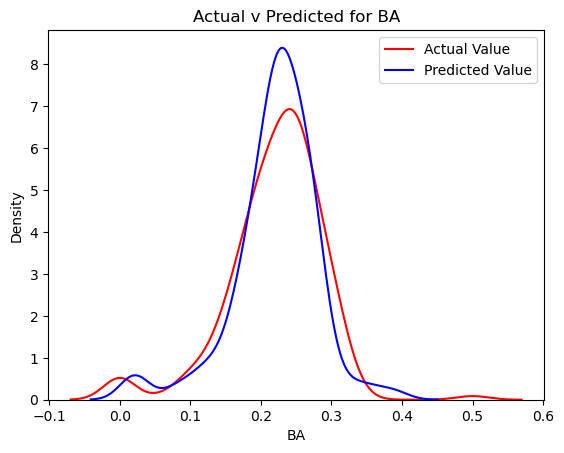

In [15]:
ax1 = sns.kdeplot(current_batting['BA'], color='r', label='Actual BA')
sns.kdeplot(yhat, color='b', label='Predicted BA', ax=ax1)

plt.title('Actual v Predicted for BA')
plt.xlabel('BA')

plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

###### Interestingly, Shape of the distribution does tell a story here. The predicted value based on babip takes on a skinnier shape, indicating that there may be some 'regression to the mean' for hitters that may be batting better or worse than expected based on babip.

#### Reg Plot

<Axes: xlabel='babip', ylabel='BA'>

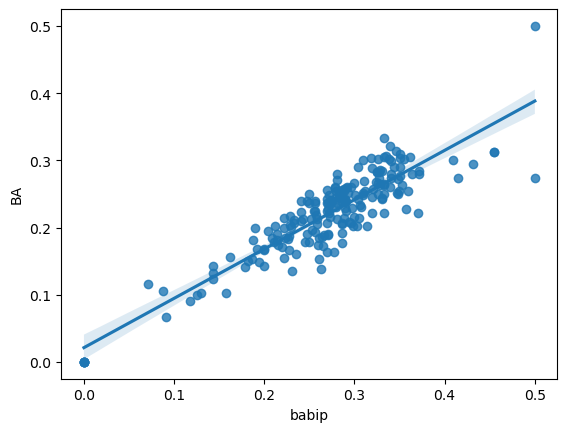

In [16]:
sns.regplot(data= current_batting, x= 'babip', y= 'BA')

#### Let's Calculate League Avg BABIP to use to predict player averages (league estimates ~.300)

In [22]:
#best way to do this is by not taking mean of babip, but summing each portion of babip calc for each player and then doing mean
league_avg_babip_calc = round((current_batting['H'].sum(axis=0) - current_batting['HR'].sum(axis=0))/(current_batting['AB'].sum(axis=0) - current_batting['SO'].sum(axis=0) - current_batting['HR'].sum(axis=0) + current_batting['SF'].sum(axis=0)), 3)
league_avg_babip_calc

#add league avg babip based on this years statcast data for sample of X players, and historical avg of .300 to our main df
current_batting['babip_avg_calc'] = league_avg_babip_calc
current_batting['babip_avg_hist'] = round(.300, 3)

current_batting.head()




,mlbID,Name,Age,#days,Lev,Tm,G,PA,AB,R,...,SLG,OPS,bat_speed,swing_length,launch_speed,launch_angle,release_speed,babip,babip_avg_calc,babip_avg_hist
0,682928,CJ Abrams,23,2,Maj-NL,Washington,65,288,264,40,...,0.477,0.787,70.267285,7.377119,81.683095,16.824228,88.659184,0.288,0.288,0.3
1,547989,Jos\xc3\xa9 Abreu,37,6,Maj-AL,Houston,35,120,113,10,...,0.195,0.361,71.232184,6.994067,82.387195,13.079268,89.685802,0.143,0.288,0.3
2,677800,Wilyer Abreu,25,16,Maj-AL,Boston,53,189,169,26,...,0.485,0.829,73.164408,7.330477,83.360426,23.727660,88.987366,0.348,0.288,0.3
3,660670,Ronald Acu\xc3\xb1a Jr.,26,23,Maj-NL,Atlanta,49,222,192,38,...,0.365,0.716,74.580044,7.512827,84.125175,18.927336,90.109282,0.326,0.288,0.3
4,642715,Willy Adames,28,1,Maj-NL,Milwaukee,72,313,274,38,...,0.434,0.763,72.633010,8.084869,84.490281,23.874680,89.690560,0.274,0.288,0.3


#### Predict BA based on current league avg and hist league avg and add to main df

In [28]:
current_batting['BA_predict_player_babip'] = yhat.round(3)
#should be close to 

current_batting[['Name', 'BA', 'babip', 'BA_predict_player_babip']].head()




,Name,BA,babip,BA_predict_player_babip
0,CJ Abrams,0.258,0.288,0.233
1,Jos\xc3\xa9 Abreu,0.124,0.143,0.126
2,Wilyer Abreu,0.272,0.348,0.277
3,Ronald Acu\xc3\xb1a Jr.,0.250,0.326,0.261
4,Willy Adames,0.241,0.274,0.222
